### **In this part we performs basic Exploratory Data Analysis (EDA) on the chosen dataset. It includes data loading, cleaning, visualization, and summary statistics to understand the underlying patterns and relationships within the data.**
---

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

PATH_TO_DATA = "../csv_exports/"

Initialize dataframe on main dataset. Using flag `low_memory = False` not to limit memory usage.


Lets add item dataset as df_items.

In [6]:
df_items = pd.read_csv(PATH_TO_DATA + "item_full_export.csv", low_memory=False)
df_items

,market_hash_name,classid,instanceid,asset,stamp,float,paintseed,stickers,chance_to_transfer,price,id,real_instance,old_price,base_id,phase,paintindex,type,avg_price
0,Sticker | fnx | Cologne 2016,1835681296,188530139,0,2024-10-24 23:42:49,NaN,NaN,NaN,0.0,52116.0,88473924,188530139,0.0,0,NaN,NaN,Sticker,NaN
1,Sealed Graffiti | Smarmy (War Pig Pink),3608084332,519977179,18045451491,2024-10-24 23:02:29,0.000000,NaN,NaN,50.0,720.0,670444127,519977179,0.0,81278,NaN,0.0,Graffiti,NaN
2,StatTrak™ P250 | Muertos (Minimal Wear),3245227603,902658099,16210381346,2024-10-24 23:42:49,0.113143,NaN,1909039045|1909039045|1909039045,70.0,19679.0,1013402736,902658099,177700.0,741,NaN,NaN,Pistol,NaN
3,Nova | Windblown (Battle-Scarred),4428769401,188530139,25049162004,2024-10-25 00:03:19,0.480939,NaN,NaN,90.0,511.0,2660532544,188530139,0.0,84521,NaN,NaN,Shotgun,NaN
4,Sealed Graffiti | Oops (Cash Green),3608084804,519977179,0,2024-10-24 22:14:59,NaN,NaN,NaN,70.0,209.0,3507516681,519977179,0.0,0,NaN,NaN,Graffiti,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701615,AWP | Neo-Noir (Minimal Wear),6221039356,5840723944,40003498872,2024-10-25 00:20:02,NaN,NaN,32006078374|31887059003|32006078374,95.0,27981.0,5843604927,5840723944,0.0,76546,NaN,NaN,Sniper Rifle,26.444125
701616,Dual Berettas | Royal Consorts (Well-Worn),6222015788,480085569,40030174124,2024-10-25 00:20:03,NaN,NaN,NaN,100.0,430.0,5843604935,480085569,0.0,2835,NaN,NaN,Pistol,0.388125
701617,Desert Eagle | Code Red (Battle-Scarred),6221039350,188530139,40004199066,2024-10-25 00:20:03,NaN,NaN,9074754424,95.0,16589.0,5843604943,188530139,0.0,4506,NaN,NaN,Pistol,15.529904
701618,Chroma 2 Case,926978479,0,39910167364,2024-10-25 00:20:03,NaN,NaN,NaN,75.0,2771.0,5843604951,0,0.0,920,NaN,NaN,Container,2.204951


The initial dimensionality of the created dataframe is 701620 rows x 18 columns.



As we saw in the previous output, some of the items dont have avg_price or float and marked as NA or zeros. We dont need such data so lets drop the useless pieces of information.

In [7]:
df_items.dropna(subset=["float", "avg_price"], inplace = True)
df_items = df_items[(df_items["float"] != 0) & (df_items["avg_price"] != 0)]
df_items

,market_hash_name,classid,instanceid,asset,stamp,float,paintseed,stickers,chance_to_transfer,price,id,real_instance,old_price,base_id,phase,paintindex,type,avg_price
1112,Glock-18 | Ironwork (Battle-Scarred),2761373390,188530139,14425847035,2024-10-24 23:42:49,0.563690,117.0,1374712292|279009099,70.0,1241.0,467995260,188530139,9900.0,2820,NaN,623.0,Pistol,0.159119
1114,XM1014 | Oxide Blaze (Field-Tested),2767958314,188530139,14300505284,2024-10-24 23:02:29,0.306029,483.0,945547078|1458432872,70.0,720.0,469051578,188530139,0.0,4333,NaN,706.0,Shotgun,0.069852
1116,CZ75-Auto | Tuxedo (Minimal Wear),2705279545,302028390,14468515467,2024-10-24 23:42:49,0.097649,615.0,381051012|381051012|1348732015,70.0,5202.0,469589379,302028390,84900.0,464,NaN,297.0,Pistol,0.673389
1118,StatTrak™ Tec-9 | Sandstorm (Field-Tested),2132759368,188530170,14466353023,2024-10-24 23:42:49,0.353863,127.0,60926680|469|61733376,50.0,2075.0,473184843,188530170,9800.0,353,NaN,289.0,Pistol,0.649870
1119,P2000 | Oceanic (Minimal Wear),2791469649,188530139,14539310580,2024-10-24 23:42:49,0.080204,885.0,1369170258|1369170258|87116,50.0,1970.0,474691476,188530139,14900.0,1775,NaN,550.0,Pistol,0.142214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701584,StatTrak™ Tec-9 | Sandstorm (Minimal Wear),1856074576,188530170,39687576355,2024-10-25 00:20:00,0.148043,237.0,62186996,90.0,2971.0,5843604567,188530170,0.0,353,NaN,289.0,Pistol,2.921500
701586,AWP | Neo-Noir (Minimal Wear),6220230337,188530139,40005460696,2024-10-25 00:19:58,0.121607,893.0,NaN,95.0,27981.0,5843604599,188530139,0.0,76546,NaN,803.0,Sniper Rifle,26.444125
701587,M4A4 | Magnesium (Minimal Wear),6221983356,188530139,40031707614,2024-10-25 00:19:55,0.108802,668.0,NaN,100.0,540.0,5843604623,188530139,0.0,76519,NaN,811.0,Rifle,0.510516
701593,P2000 | Lifted Spirits (Minimal Wear),4726072850,188530139,39498264180,2024-10-25 00:19:55,0.127356,280.0,NaN,95.0,10423080.0,5843604671,188530139,0.0,87921,NaN,1138.0,Pistol,0.087654


Nice! Now we have 292,170 rows and 13 columns. Lets move on with further cleanup!

Now, lets see how unique are the attributes in the dataframe.

In [8]:
df_items.nunique()

market_hash_name        7188
classid               138937
instanceid              6644
asset                 291633
stamp                   5984
float                 290034
paintseed               1000
stickers               47747
chance_to_transfer        95
price                  26153
id                    292170
real_instance           6641
old_price              33988
base_id                 1622
phase                      8
paintindex              1094
type                       9
avg_price               7019
dtype: int64

The id is unique value that is composite of classid, asset, instanceid, base_id and real_instance, so there is no need to keep them afterall. We could reindex the df making the id field prime index later on.

In [9]:
columns_to_drop = ["classid", "instanceid", "base_id", "real_instance", "asset"]
df_items = df_items.drop(columns=[col for col in columns_to_drop if col in df_items.columns])
df_items

,market_hash_name,stamp,float,paintseed,stickers,chance_to_transfer,price,id,old_price,phase,paintindex,type,avg_price
1112,Glock-18 | Ironwork (Battle-Scarred),2024-10-24 23:42:49,0.563690,117.0,1374712292|279009099,70.0,1241.0,467995260,9900.0,NaN,623.0,Pistol,0.159119
1114,XM1014 | Oxide Blaze (Field-Tested),2024-10-24 23:02:29,0.306029,483.0,945547078|1458432872,70.0,720.0,469051578,0.0,NaN,706.0,Shotgun,0.069852
1116,CZ75-Auto | Tuxedo (Minimal Wear),2024-10-24 23:42:49,0.097649,615.0,381051012|381051012|1348732015,70.0,5202.0,469589379,84900.0,NaN,297.0,Pistol,0.673389
1118,StatTrak™ Tec-9 | Sandstorm (Field-Tested),2024-10-24 23:42:49,0.353863,127.0,60926680|469|61733376,50.0,2075.0,473184843,9800.0,NaN,289.0,Pistol,0.649870
1119,P2000 | Oceanic (Minimal Wear),2024-10-24 23:42:49,0.080204,885.0,1369170258|1369170258|87116,50.0,1970.0,474691476,14900.0,NaN,550.0,Pistol,0.142214
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701584,StatTrak™ Tec-9 | Sandstorm (Minimal Wear),2024-10-25 00:20:00,0.148043,237.0,62186996,90.0,2971.0,5843604567,0.0,NaN,289.0,Pistol,2.921500
701586,AWP | Neo-Noir (Minimal Wear),2024-10-25 00:19:58,0.121607,893.0,NaN,95.0,27981.0,5843604599,0.0,NaN,803.0,Sniper Rifle,26.444125
701587,M4A4 | Magnesium (Minimal Wear),2024-10-25 00:19:55,0.108802,668.0,NaN,100.0,540.0,5843604623,0.0,NaN,811.0,Rifle,0.510516
701593,P2000 | Lifted Spirits (Minimal Wear),2024-10-25 00:19:55,0.127356,280.0,NaN,95.0,10423080.0,5843604671,0.0,NaN,1138.0,Pistol,0.087654


Perfect! Now the dimensionality of the dataset is reduced to 13 columns and 292,170 rows.

Our goal is to see how **sticker prices** affect the **item's price**. The dataset is a listing that consists of all items avialable for purchase as of 24.10.2024.
ISomeitems tsuch as **`Sticker`(obvious one), `Knife`, `Gloves`, `Agent`**cant' have stickers placed on them., sets filter them out.


In [10]:
unique_types = df_items['type'].unique()
print(unique_types)

['Pistol' 'Shotgun' 'SMG' 'Rifle' 'Sniper Rifle' 'Machinegun' 'Gloves'
 'Knife' 'Sticker']


In [11]:
types_to_delete = ['Knife', 'Gloves', 'Agent', 'Sticker']
df_items.drop(df_items[df_items['type'].isin(types_to_delete)].index, inplace=True)
df_items


,market_hash_name,stamp,float,paintseed,stickers,chance_to_transfer,price,id,old_price,phase,paintindex,type,avg_price
1112,Glock-18 | Ironwork (Battle-Scarred),2024-10-24 23:42:49,0.563690,117.0,1374712292|279009099,70.0,1241.0,467995260,9900.0,NaN,623.0,Pistol,0.159119
1114,XM1014 | Oxide Blaze (Field-Tested),2024-10-24 23:02:29,0.306029,483.0,945547078|1458432872,70.0,720.0,469051578,0.0,NaN,706.0,Shotgun,0.069852
1116,CZ75-Auto | Tuxedo (Minimal Wear),2024-10-24 23:42:49,0.097649,615.0,381051012|381051012|1348732015,70.0,5202.0,469589379,84900.0,NaN,297.0,Pistol,0.673389
1118,StatTrak™ Tec-9 | Sandstorm (Field-Tested),2024-10-24 23:42:49,0.353863,127.0,60926680|469|61733376,50.0,2075.0,473184843,9800.0,NaN,289.0,Pistol,0.649870
1119,P2000 | Oceanic (Minimal Wear),2024-10-24 23:42:49,0.080204,885.0,1369170258|1369170258|87116,50.0,1970.0,474691476,14900.0,NaN,550.0,Pistol,0.142214
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701584,StatTrak™ Tec-9 | Sandstorm (Minimal Wear),2024-10-25 00:20:00,0.148043,237.0,62186996,90.0,2971.0,5843604567,0.0,NaN,289.0,Pistol,2.921500
701586,AWP | Neo-Noir (Minimal Wear),2024-10-25 00:19:58,0.121607,893.0,NaN,95.0,27981.0,5843604599,0.0,NaN,803.0,Sniper Rifle,26.444125
701587,M4A4 | Magnesium (Minimal Wear),2024-10-25 00:19:55,0.108802,668.0,NaN,100.0,540.0,5843604623,0.0,NaN,811.0,Rifle,0.510516
701593,P2000 | Lifted Spirits (Minimal Wear),2024-10-25 00:19:55,0.127356,280.0,NaN,95.0,10423080.0,5843604671,0.0,NaN,1138.0,Pistol,0.087654


Also there are few columns that have no value to our goal whatsoever. These inlcude: `stamp` - we do not care about when the item was placed on the market; `old_price` - the field is there to show the previously set price for the item; `chance_to_transfer` - the field describes the user, not the item and doesnt affect the price directly.

Few columns hold no relevance to our goal and can be excluded. These include:

`stamp`: when item was listed, which is not matter to our analysis;
`old_price`: this field only displays the previous price set by the user before any adjustments;
`chance_to_transfer`: this field provides information about the user who listed the item.

In [12]:
useless_fields = ['old_price', 'stamp', 'chance_to_transfer']
df_items.drop(columns=[col for col in useless_fields if col in df_items.columns], inplace=True)
df_items

,market_hash_name,float,paintseed,stickers,price,id,phase,paintindex,type,avg_price
1112,Glock-18 | Ironwork (Battle-Scarred),0.563690,117.0,1374712292|279009099,1241.0,467995260,NaN,623.0,Pistol,0.159119
1114,XM1014 | Oxide Blaze (Field-Tested),0.306029,483.0,945547078|1458432872,720.0,469051578,NaN,706.0,Shotgun,0.069852
1116,CZ75-Auto | Tuxedo (Minimal Wear),0.097649,615.0,381051012|381051012|1348732015,5202.0,469589379,NaN,297.0,Pistol,0.673389
1118,StatTrak™ Tec-9 | Sandstorm (Field-Tested),0.353863,127.0,60926680|469|61733376,2075.0,473184843,NaN,289.0,Pistol,0.649870
1119,P2000 | Oceanic (Minimal Wear),0.080204,885.0,1369170258|1369170258|87116,1970.0,474691476,NaN,550.0,Pistol,0.142214
...,...,...,...,...,...,...,...,...,...,...
701584,StatTrak™ Tec-9 | Sandstorm (Minimal Wear),0.148043,237.0,62186996,2971.0,5843604567,NaN,289.0,Pistol,2.921500
701586,AWP | Neo-Noir (Minimal Wear),0.121607,893.0,NaN,27981.0,5843604599,NaN,803.0,Sniper Rifle,26.444125
701587,M4A4 | Magnesium (Minimal Wear),0.108802,668.0,NaN,540.0,5843604623,NaN,811.0,Rifle,0.510516
701593,P2000 | Lifted Spirits (Minimal Wear),0.127356,280.0,NaN,10423080.0,5843604671,NaN,1138.0,Pistol,0.087654


Awesome! Now we have a clean dataset with only the necessary columns. Let's move on to the next step: data analysis and visualization. We will create some plots to explore the relationships between different variables in the dataset.

Lets gather some detailed info about the dataset.

In [13]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283747 entries, 1112 to 701594
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   market_hash_name  283747 non-null  object 
 1   float             283747 non-null  float64
 2   paintseed         280538 non-null  float64
 3   stickers          89042 non-null   object 
 4   price             283747 non-null  float64
 5   id                283747 non-null  int64  
 6   phase             326 non-null     object 
 7   paintindex        280812 non-null  float64
 8   type              283747 non-null  object 
 9   avg_price         283747 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 23.8+ MB


There are `89042` items with stickers on them.


In [14]:
df_items.describe()


,float,paintseed,price,id,paintindex,avg_price
count,283747.000000,280538.000000,2.837470e+05,2.837470e+05,280812.000000,283747.000000
mean,0.316999,499.579130,2.348231e+04,5.662368e+09,681.566340,5.076443
std,0.209315,288.090955,1.108226e+06,4.451713e+08,362.726876,37.973618
min,0.000002,1.000000,7.000000e+00,4.679953e+08,2.000000,0.006000
25%,0.141067,251.000000,2.090000e+02,5.698247e+09,397.000000,0.115000
50%,0.286799,499.000000,7.720000e+02,5.823015e+09,702.000000,0.541286
75%,0.429702,749.000000,3.952000e+03,5.840260e+09,969.000000,2.895905
max,0.999884,1000.000000,1.621368e+08,5.843605e+09,1255.000000,6695.448500


The price in the data set is in (dollar+cents)*1000. Lets "standartize" it to just dollar+cents

In [15]:
df_items['price'] = df_items["price"]/1000
df_items.describe()

,float,paintseed,price,id,paintindex,avg_price
count,283747.000000,280538.000000,283747.000000,2.837470e+05,280812.000000,283747.000000
mean,0.316999,499.579130,23.482315,5.662368e+09,681.566340,5.076443
std,0.209315,288.090955,1108.226426,4.451713e+08,362.726876,37.973618
min,0.000002,1.000000,0.007000,4.679953e+08,2.000000,0.006000
25%,0.141067,251.000000,0.209000,5.698247e+09,397.000000,0.115000
50%,0.286799,499.000000,0.772000,5.823015e+09,702.000000,0.541286
75%,0.429702,749.000000,3.952000,5.840260e+09,969.000000,2.895905
max,0.999884,1000.000000,162136.795000,5.843605e+09,1255.000000,6695.448500


Filter the dataframe to show items with the top 12 most popular market_hash_name

In [16]:
top_12_popular_names = df_items['market_hash_name'].value_counts().head(12).index
top_12_popular_names_count = df_items['market_hash_name'].value_counts().head(12)
print(top_12_popular_names_count.to_frame().reset_index().rename(columns={'index': 'market_hash_name', 'market_hash_name': 'count'}))

                                             count  count
0                   P250 | Cassette (Field-Tested)   1777
1               AK-47 | Safari Mesh (Field-Tested)   1519
2                     AK-47 | Slate (Field-Tested)   1303
3               Glock-18 | High Beam (Factory New)    873
4              Five-SeveN | Coolant (Field-Tested)    864
5                       SSG 08 | Abyss (Well-Worn)    739
6                Tec-9 | Red Quartz (Field-Tested)    709
7                     AWP | Atheris (Field-Tested)    665
8               AK-47 | Safari Mesh (Minimal Wear)    634
9   Desert Eagle | Mecha Industries (Field-Tested)    629
10         StatTrak™ SG 553 | Aloha (Field-Tested)    624
11                SSG 08 | Acid Fade (Factory New)    601


Here are boxplots for the 12 most popular items to examine price dependency on stickers. This analysis will also help in identifying any anomalies within the dataset.

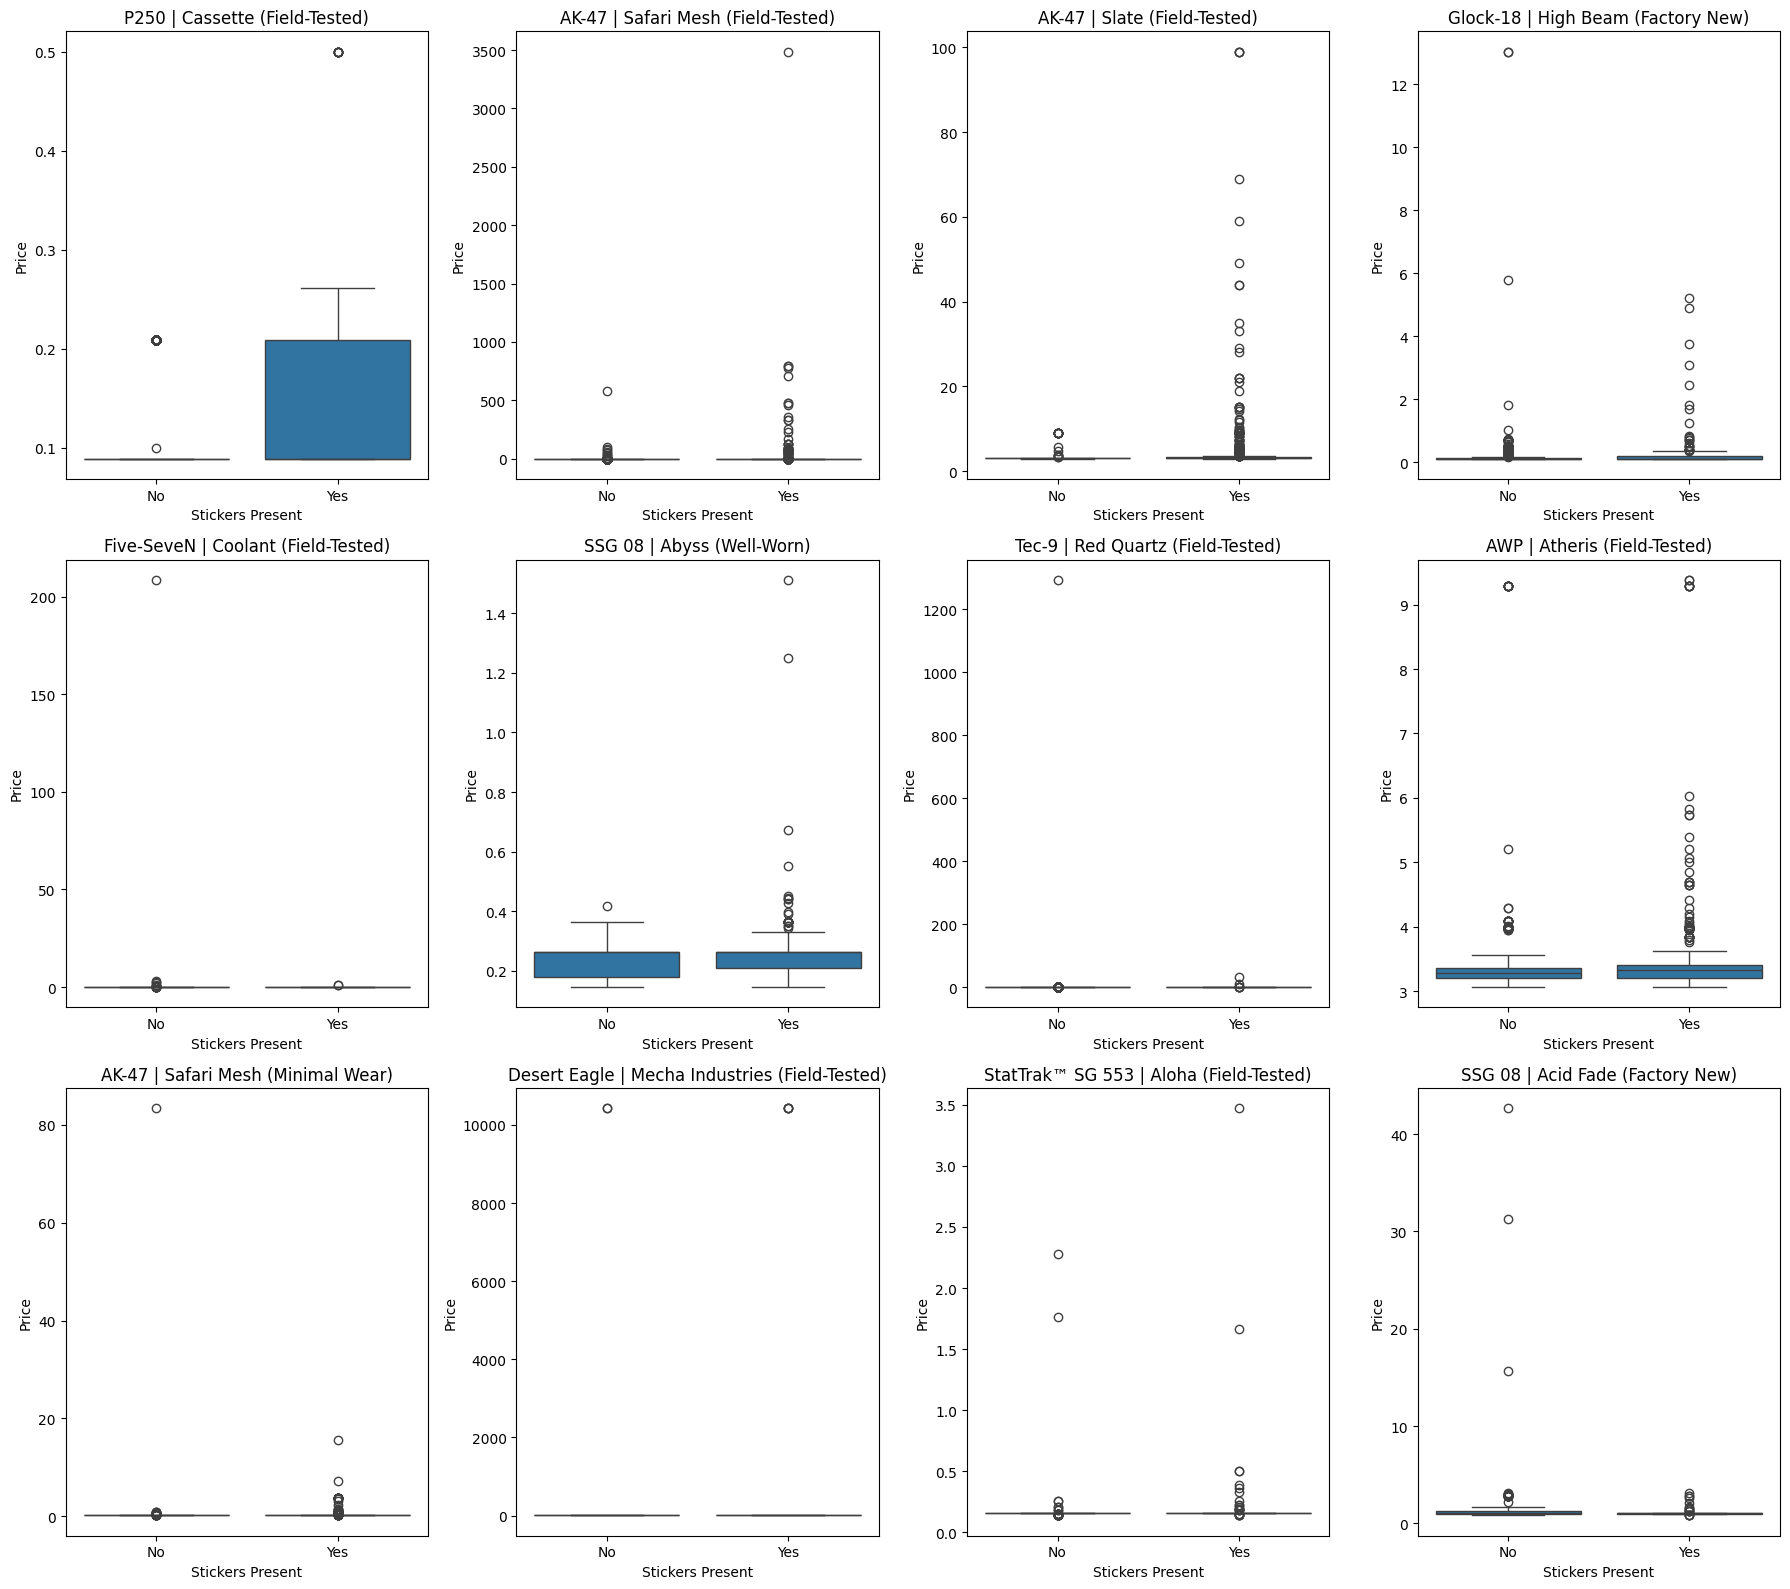

In [17]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 16))
axes = axes.flatten()

# Iterate through each item in the top 12 most popular items
for i, item in enumerate(top_12_popular_names):
    item_data = df_items[df_items['market_hash_name'] == item]
    
    # Create a box plot for the current item
    sns.boxplot(x=item_data['stickers'].notna(), y='price', data=item_data, ax=axes[i])
    axes[i].set_title(item)
    axes[i].set_xlabel('Stickers Present')
    axes[i].set_ylabel('Price')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()

Trying to use Robust scaler to better understand graphics

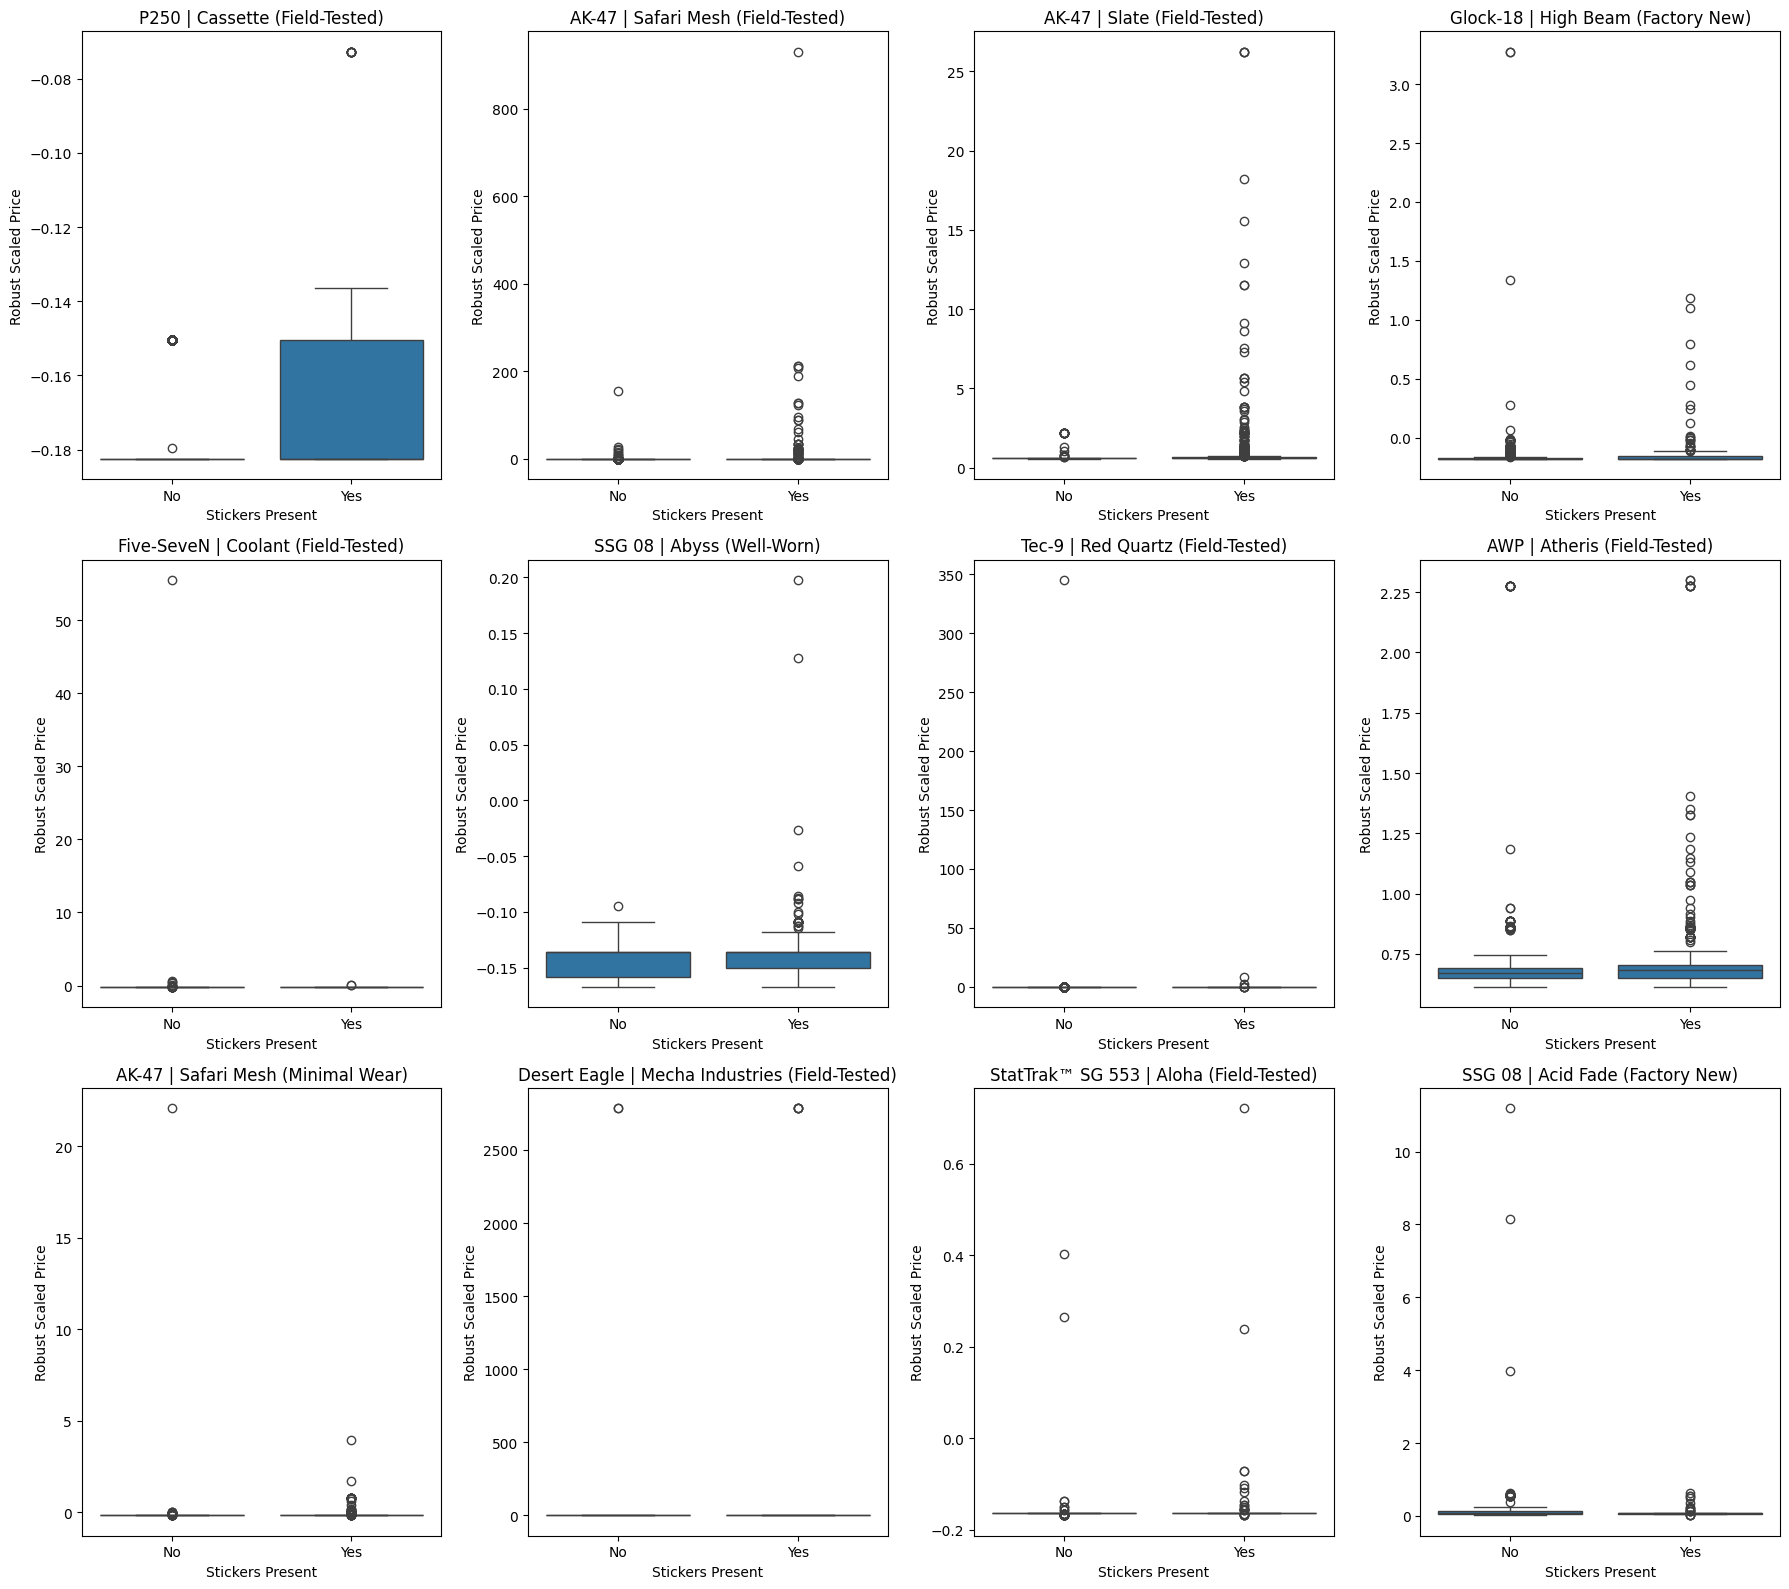

In [18]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
# Apply RobustScaler to the 'price' column and save to a different dataframe
df_items_scaled = df_items.copy()
df_items_scaled['price'] = robust_scaler.fit_transform(df_items_scaled[['price']])

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 16))
axes = axes.flatten()

# Iterate through each item in the top 12 most popular items
for i, item in enumerate(top_12_popular_names):
    item_data = df_items_scaled[df_items_scaled['market_hash_name'] == item]
    
    # Create a box plot for the current item
    sns.boxplot(x=item_data['stickers'].notna(), y='price', data=item_data, ax=axes[i])
    axes[i].set_title(item)
    axes[i].set_xlabel('Stickers Present')
    axes[i].set_ylabel('Robust Scaled Price')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()


As we can see there are some data anomalies. Even the RobustScaler didnt help with outliers. We'll try to fix those anomalies

In [19]:

condition_no_stickers = (df_items['stickers'].isna()) & (df_items['price'] <= df_items['avg_price'] * 20)
condition_with_stickers = (df_items['stickers'].notna()) & (df_items['price'] <= df_items['avg_price'] * 100)

df_items = df_items[condition_no_stickers | condition_with_stickers]

df_items

,market_hash_name,float,paintseed,stickers,price,id,phase,paintindex,type,avg_price
1112,Glock-18 | Ironwork (Battle-Scarred),0.563690,117.0,1374712292|279009099,1.241,467995260,NaN,623.0,Pistol,0.159119
1114,XM1014 | Oxide Blaze (Field-Tested),0.306029,483.0,945547078|1458432872,0.720,469051578,NaN,706.0,Shotgun,0.069852
1116,CZ75-Auto | Tuxedo (Minimal Wear),0.097649,615.0,381051012|381051012|1348732015,5.202,469589379,NaN,297.0,Pistol,0.673389
1118,StatTrak™ Tec-9 | Sandstorm (Field-Tested),0.353863,127.0,60926680|469|61733376,2.075,473184843,NaN,289.0,Pistol,0.649870
1119,P2000 | Oceanic (Minimal Wear),0.080204,885.0,1369170258|1369170258|87116,1.970,474691476,NaN,550.0,Pistol,0.142214
...,...,...,...,...,...,...,...,...,...,...
701581,XM1014 | Black Tie (Well-Worn),0.411214,157.0,18175348010|18194024765,0.358,5843604519,NaN,557.0,Shotgun,0.444889
701584,StatTrak™ Tec-9 | Sandstorm (Minimal Wear),0.148043,237.0,62186996,2.971,5843604567,NaN,289.0,Pistol,2.921500
701586,AWP | Neo-Noir (Minimal Wear),0.121607,893.0,NaN,27.981,5843604599,NaN,803.0,Sniper Rifle,26.444125
701587,M4A4 | Magnesium (Minimal Wear),0.108802,668.0,NaN,0.540,5843604623,NaN,811.0,Rifle,0.510516


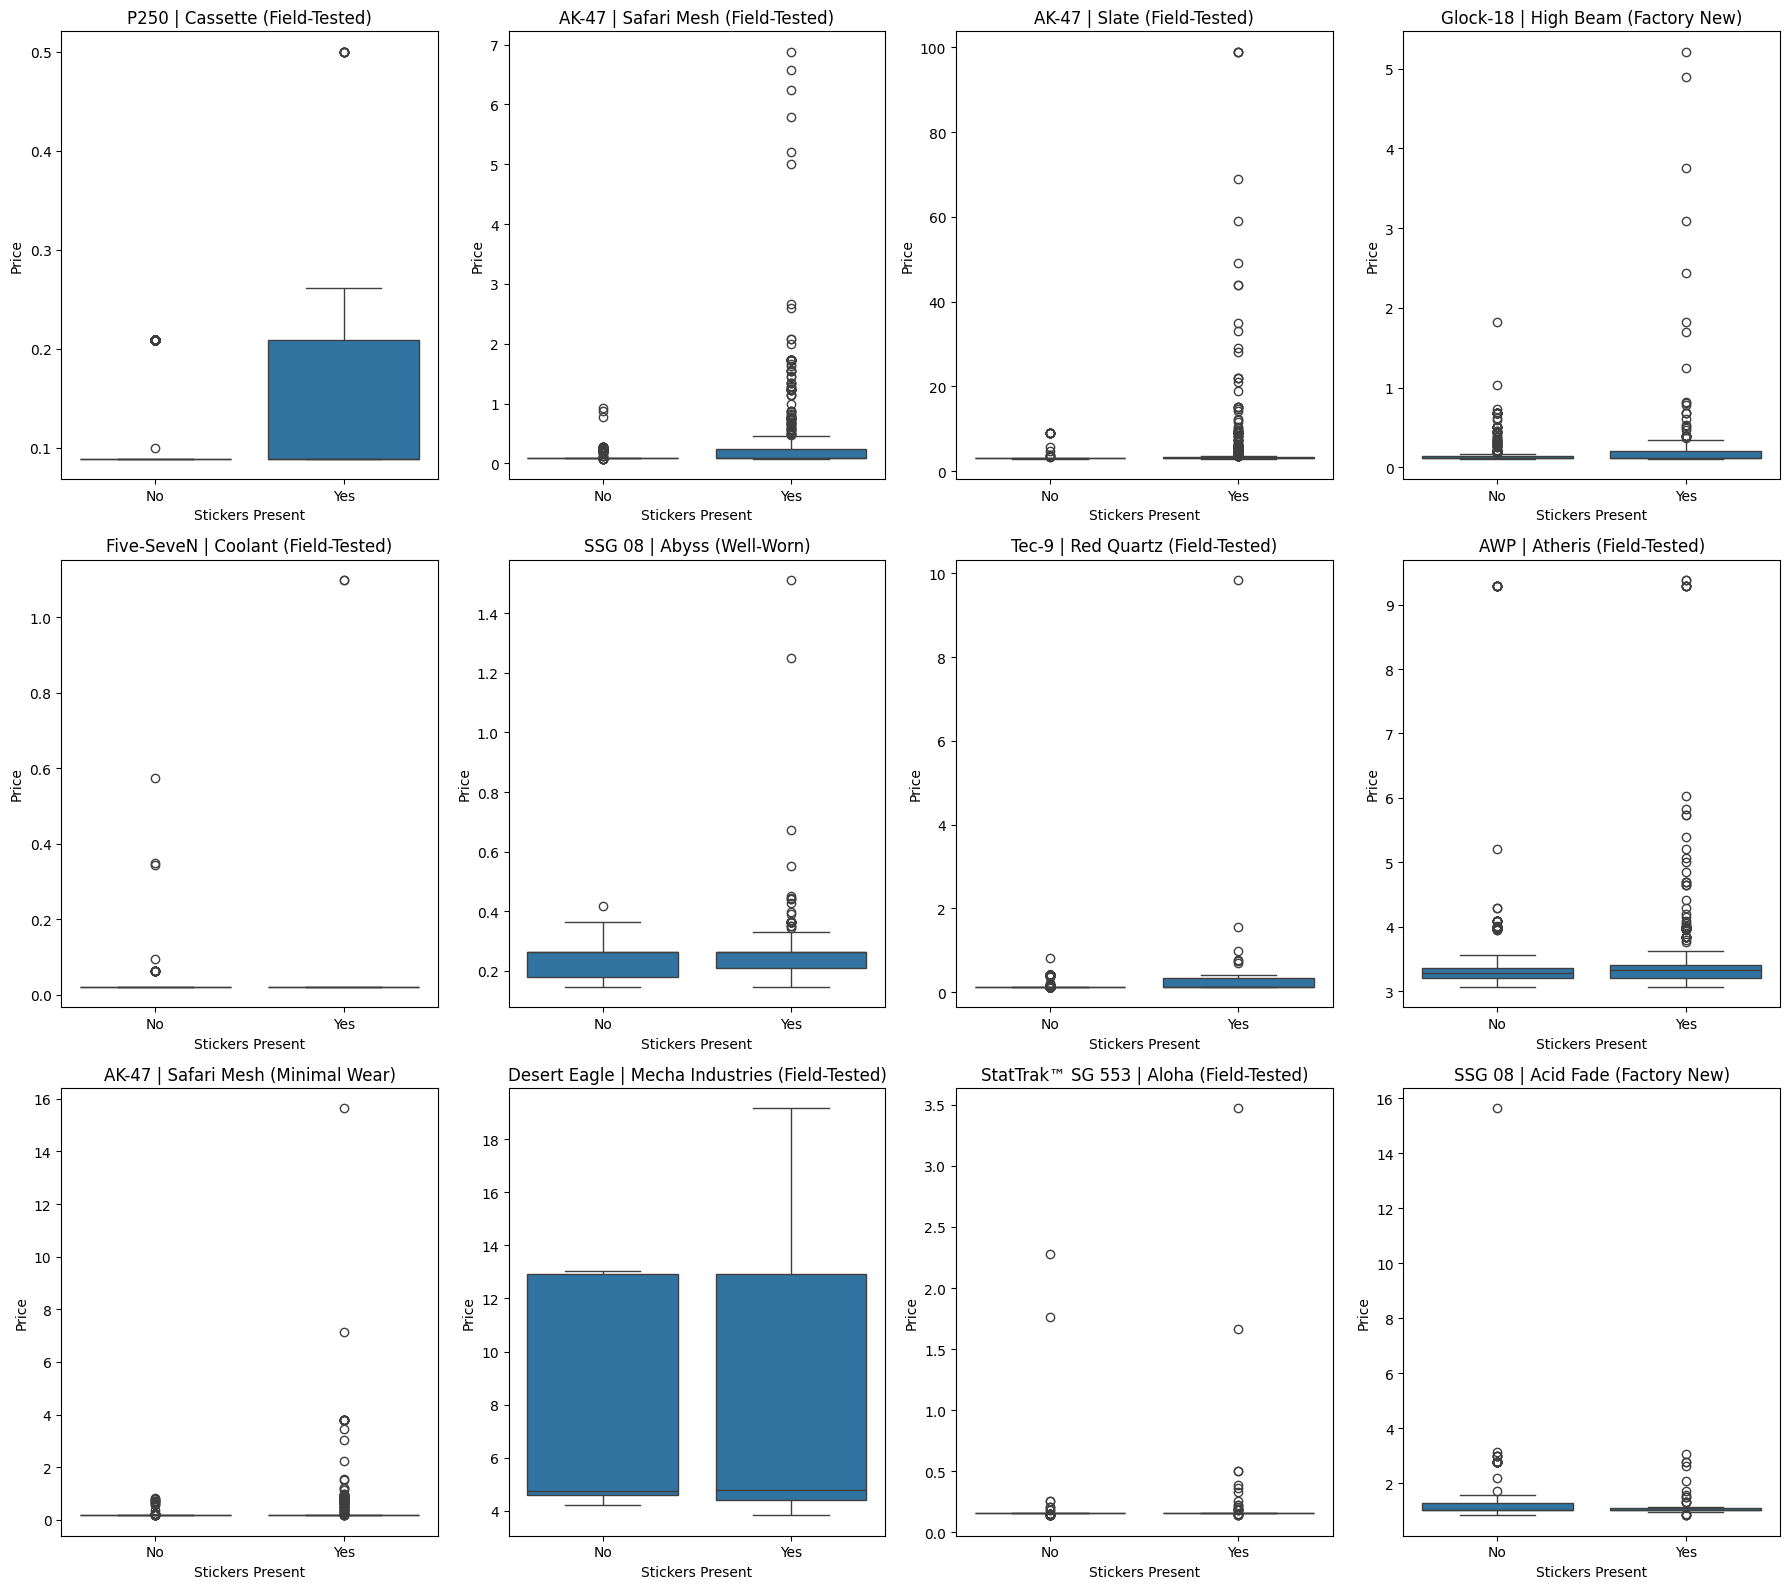

In [20]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 16))
axes = axes.flatten()

# Iterate through each item in the top 12 most popular items
for i, item in enumerate(top_12_popular_names):
    item_data = df_items[df_items['market_hash_name'] == item]
    
    # Create a box plot for the current item
    sns.boxplot(x=item_data['stickers'].notna(), y='price', data=item_data, ax=axes[i])
    axes[i].set_title(item)
    axes[i].set_xlabel('Stickers Present')
    axes[i].set_ylabel('Price')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()

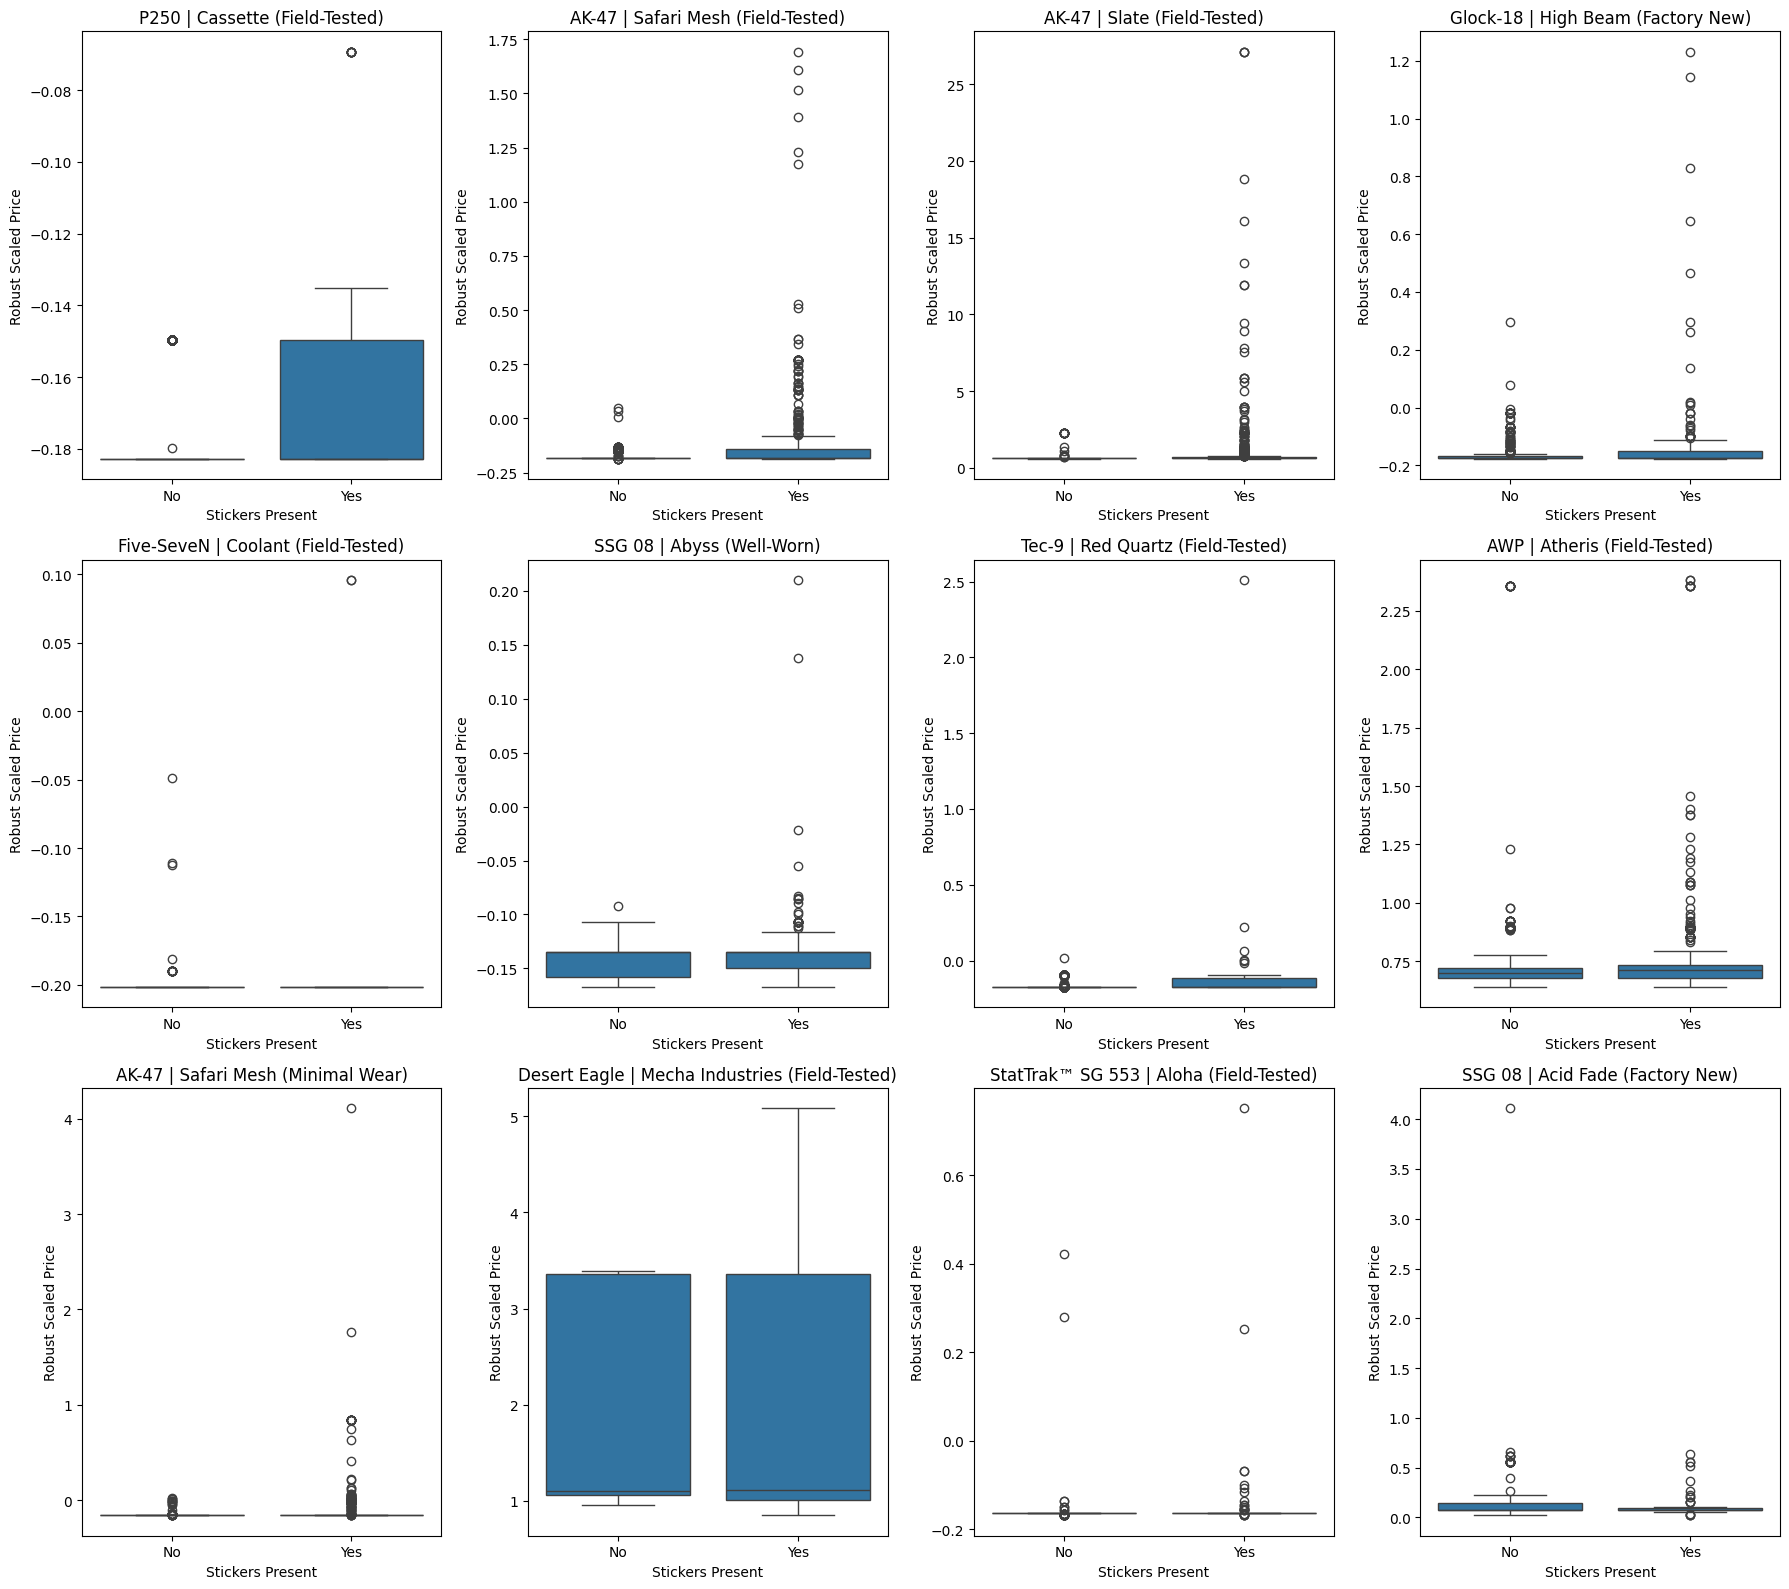

In [21]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
# Apply RobustScaler to the 'price' column and save to a different dataframe
df_items_scaled = df_items.copy()
df_items_scaled['price'] = robust_scaler.fit_transform(df_items_scaled[['price']])

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 16))
axes = axes.flatten()

# Iterate through each item in the top 12 most popular items
for i, item in enumerate(top_12_popular_names):
    item_data = df_items_scaled[df_items_scaled['market_hash_name'] == item]
    
    # Create a box plot for the current item
    sns.boxplot(x=item_data['stickers'].notna(), y='price', data=item_data, ax=axes[i])
    axes[i].set_title(item)
    axes[i].set_xlabel('Stickers Present')
    axes[i].set_ylabel('Robust Scaled Price')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()

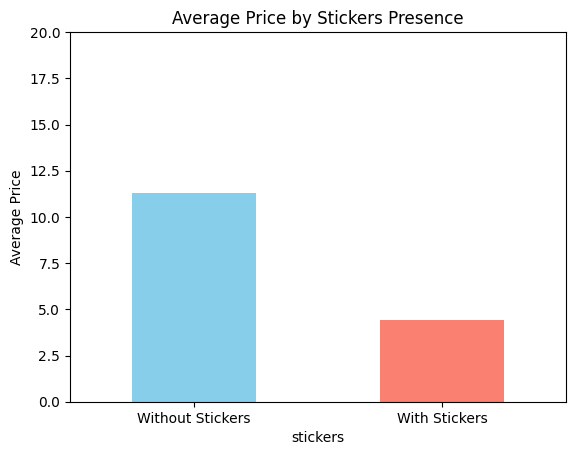

In [22]:
items_filtered_without_stickers = df_items[df_items['stickers'].isna()]['market_hash_name'].unique()
items_filtered_with_stickers = df_items[df_items['stickers'].notna()]['market_hash_name'].unique()


df_filtered = df_items[df_items['market_hash_name'].isin(items_filtered_without_stickers) & df_items['market_hash_name'].isin(items_filtered_with_stickers)]

avg_price_by_sticker = df_filtered.groupby(df_filtered['stickers'].isna())['price'].mean()

avg_price_by_sticker.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Without Stickers', 'With Stickers'], rotation=0)
plt.ylabel('Average Price')
plt.title('Average Price by Stickers Presence')
plt.ylim(0,20) 
plt.show()

In [23]:
avg_price_by_sticker_all= df_items.groupby(df_items['stickers'].isna())['avg_price'].mean()


avg_price_by_sticker_all

stickers
False    8.255300
True     3.681875
Name: avg_price, dtype: float64

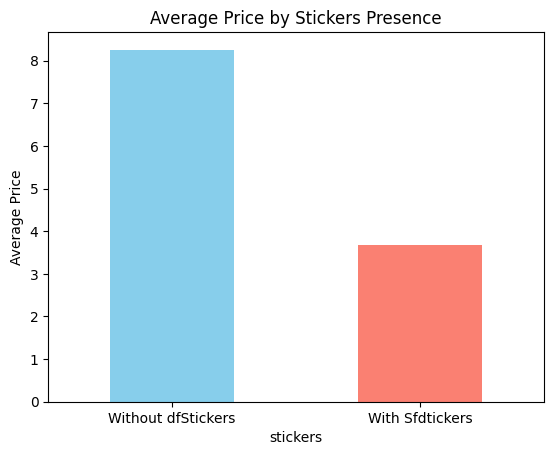

In [24]:
avg_price_by_sticker_all.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Without dfStickers', 'With Sfdtickers' ], rotation=0)
plt.ylabel('Average Price')
plt. title('Average Price by Stickers Presence')
plt.show()

In [25]:
items_with_stickers = df_items['stickers'].notna().sum()
items_without_stickers = df_items['stickers'].isna().sum()

print(f"Items with stickers: {items_with_stickers}")
print(f"Items without stickers: {items_without_stickers}")

Items with stickers: 88210
Items without stickers: 193153


In [26]:
item_to_selecet = "AK-47 | Slate (Field-Tested)"
ak47_slate = df_items[df_items['market_hash_name'] == item_to_selecet]

ak47_slate_with_stickers = ak47_slate[ak47_slate['stickers'].notna()].shape[0]
ak47_slate_without_stickers = ak47_slate[ak47_slate['stickers'].isna()].shape[0]
print(f'{item_to_selecet} with stickers: {ak47_slate_with_stickers}\n{item_to_selecet} without stickers: {ak47_slate_without_stickers}')



AK-47 | Slate (Field-Tested) with stickers: 1106
AK-47 | Slate (Field-Tested) without stickers: 197


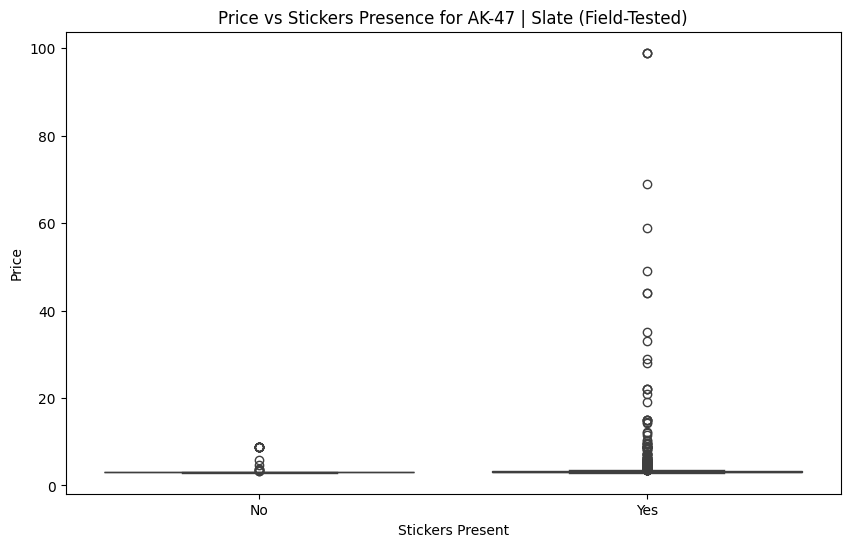

In [27]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=ak47_slate['stickers'].notna(), y='price', data=ak47_slate)
plt.title('Price vs Stickers Presence for AK-47 | Slate (Field-Tested)')
plt.xlabel('Stickers Present')
plt.ylabel('Price')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()



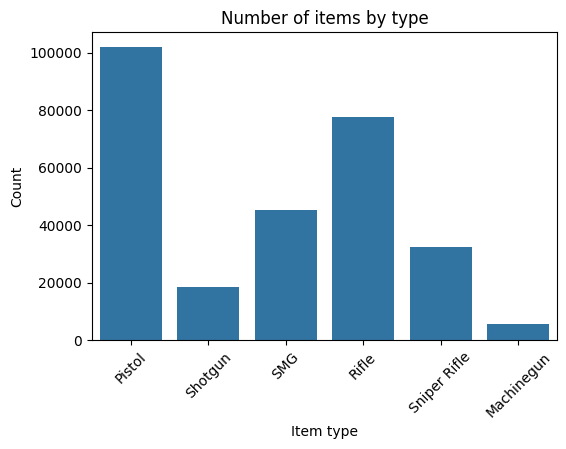

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df_items)
plt.title('Number of items by type')
plt.xlabel('Item type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [29]:
df_stiickers = pd.read_csv(PATH_TO_DATA + "sticker.csv", low_memory=False)
df_stiickers['market_hash_name'] = df_stiickers['market_hash_name'].apply(lambda x: "Sticker | " + x if "Charm: " not in x else x)
df_stiickers.head()


,id,market_hash_name,avg_price
0,5545,Sticker | ScreaM | Cluj-Napoca 2015,NaN
1,6638,Sticker | TaZ | Cluj-Napoca 2015,NaN
2,7223,Sticker | DreamHack | Cluj-Napoca 2015,NaN
3,7468,Sticker | dupreeh | Cluj-Napoca 2015,NaN
4,8743,Sticker | n0thing (Foil) | MLG Columbus 2016,NaN


In [30]:
df_steam = pd.read_json(PATH_TO_DATA + "730.json")
df_steam

,result
prices,{'UMP-45 | Facility Dark (Well-Worn)': {'1': {...
updated,1729979822


In [31]:
# def get_avg_sticker_price(sticker_ids, df_stickers):
# 	if pd.isna(sticker_ids):
# 		return 0
# 	ids = sticker_ids.split('|')
# 	prices = df_stickers[df_stickers['id'].isin(map(int, ids))]['avg_price']
# 	return prices.sum() if not prices.empty else 0

# df_items['sum_sticker_price'] = df_items['stickers'].apply(get_avg_sticker_price, df_stickers=df_stiickers)
# df_items.head()

In [32]:
# df_items_sorted = df_items.sort_values(by='avg_sticker_price', ascending=False)
# df_drop_empty_avg_sticker_price = df_items_sorted[df_items_sorted['avg_sticker_price'] != 0]
# df_drop_empty_avg_sticker_price